<a href="https://colab.research.google.com/github/YueZhangHU2025/Executive-3/blob/main/Logistic_Regression_Breast_Cancer_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Read the data from wdbc.data
df = pd.read_csv('/content/wdbc.data', header=None)

# Read the column names from the excel file
header_df = pd.read_excel('/content/list.xlsx', header=None)
column_names = header_df[0].tolist()

# Add the column names to the dataframe
df.columns = column_names

# Display the first 5 rows with the new header
display(df.head())

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# Remove the 'ID' column
df = df.drop('ID', axis=1)

# Display the first 5 rows with the new header
display(df.head())

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Handle missing values by filling with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Verify that there are no more missing values
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Missing values after handling:
Diagnosis               

/tmp/ipython-input-4-1348244863.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Diagnosis', data=df, palette='pink')


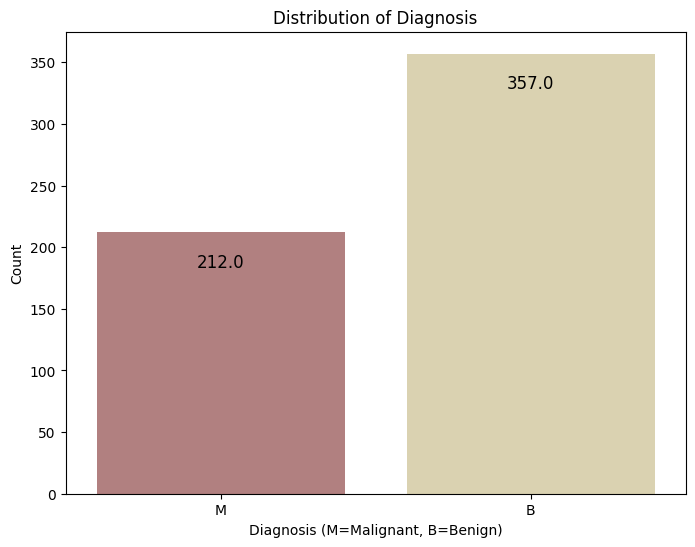

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot of the 'Diagnosis' column
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Diagnosis', data=df, palette='pink')

# Add the count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=12)

# Add title and labels
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (M=Malignant, B=Benign)')
plt.ylabel('Count')

# Display the plot
plt.show()

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display a statistical summary of the data without
print("Statistical Summary of the Data:")
display(df.describe())

Statistical Summary of the Data:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Data Distribution Visualizations:


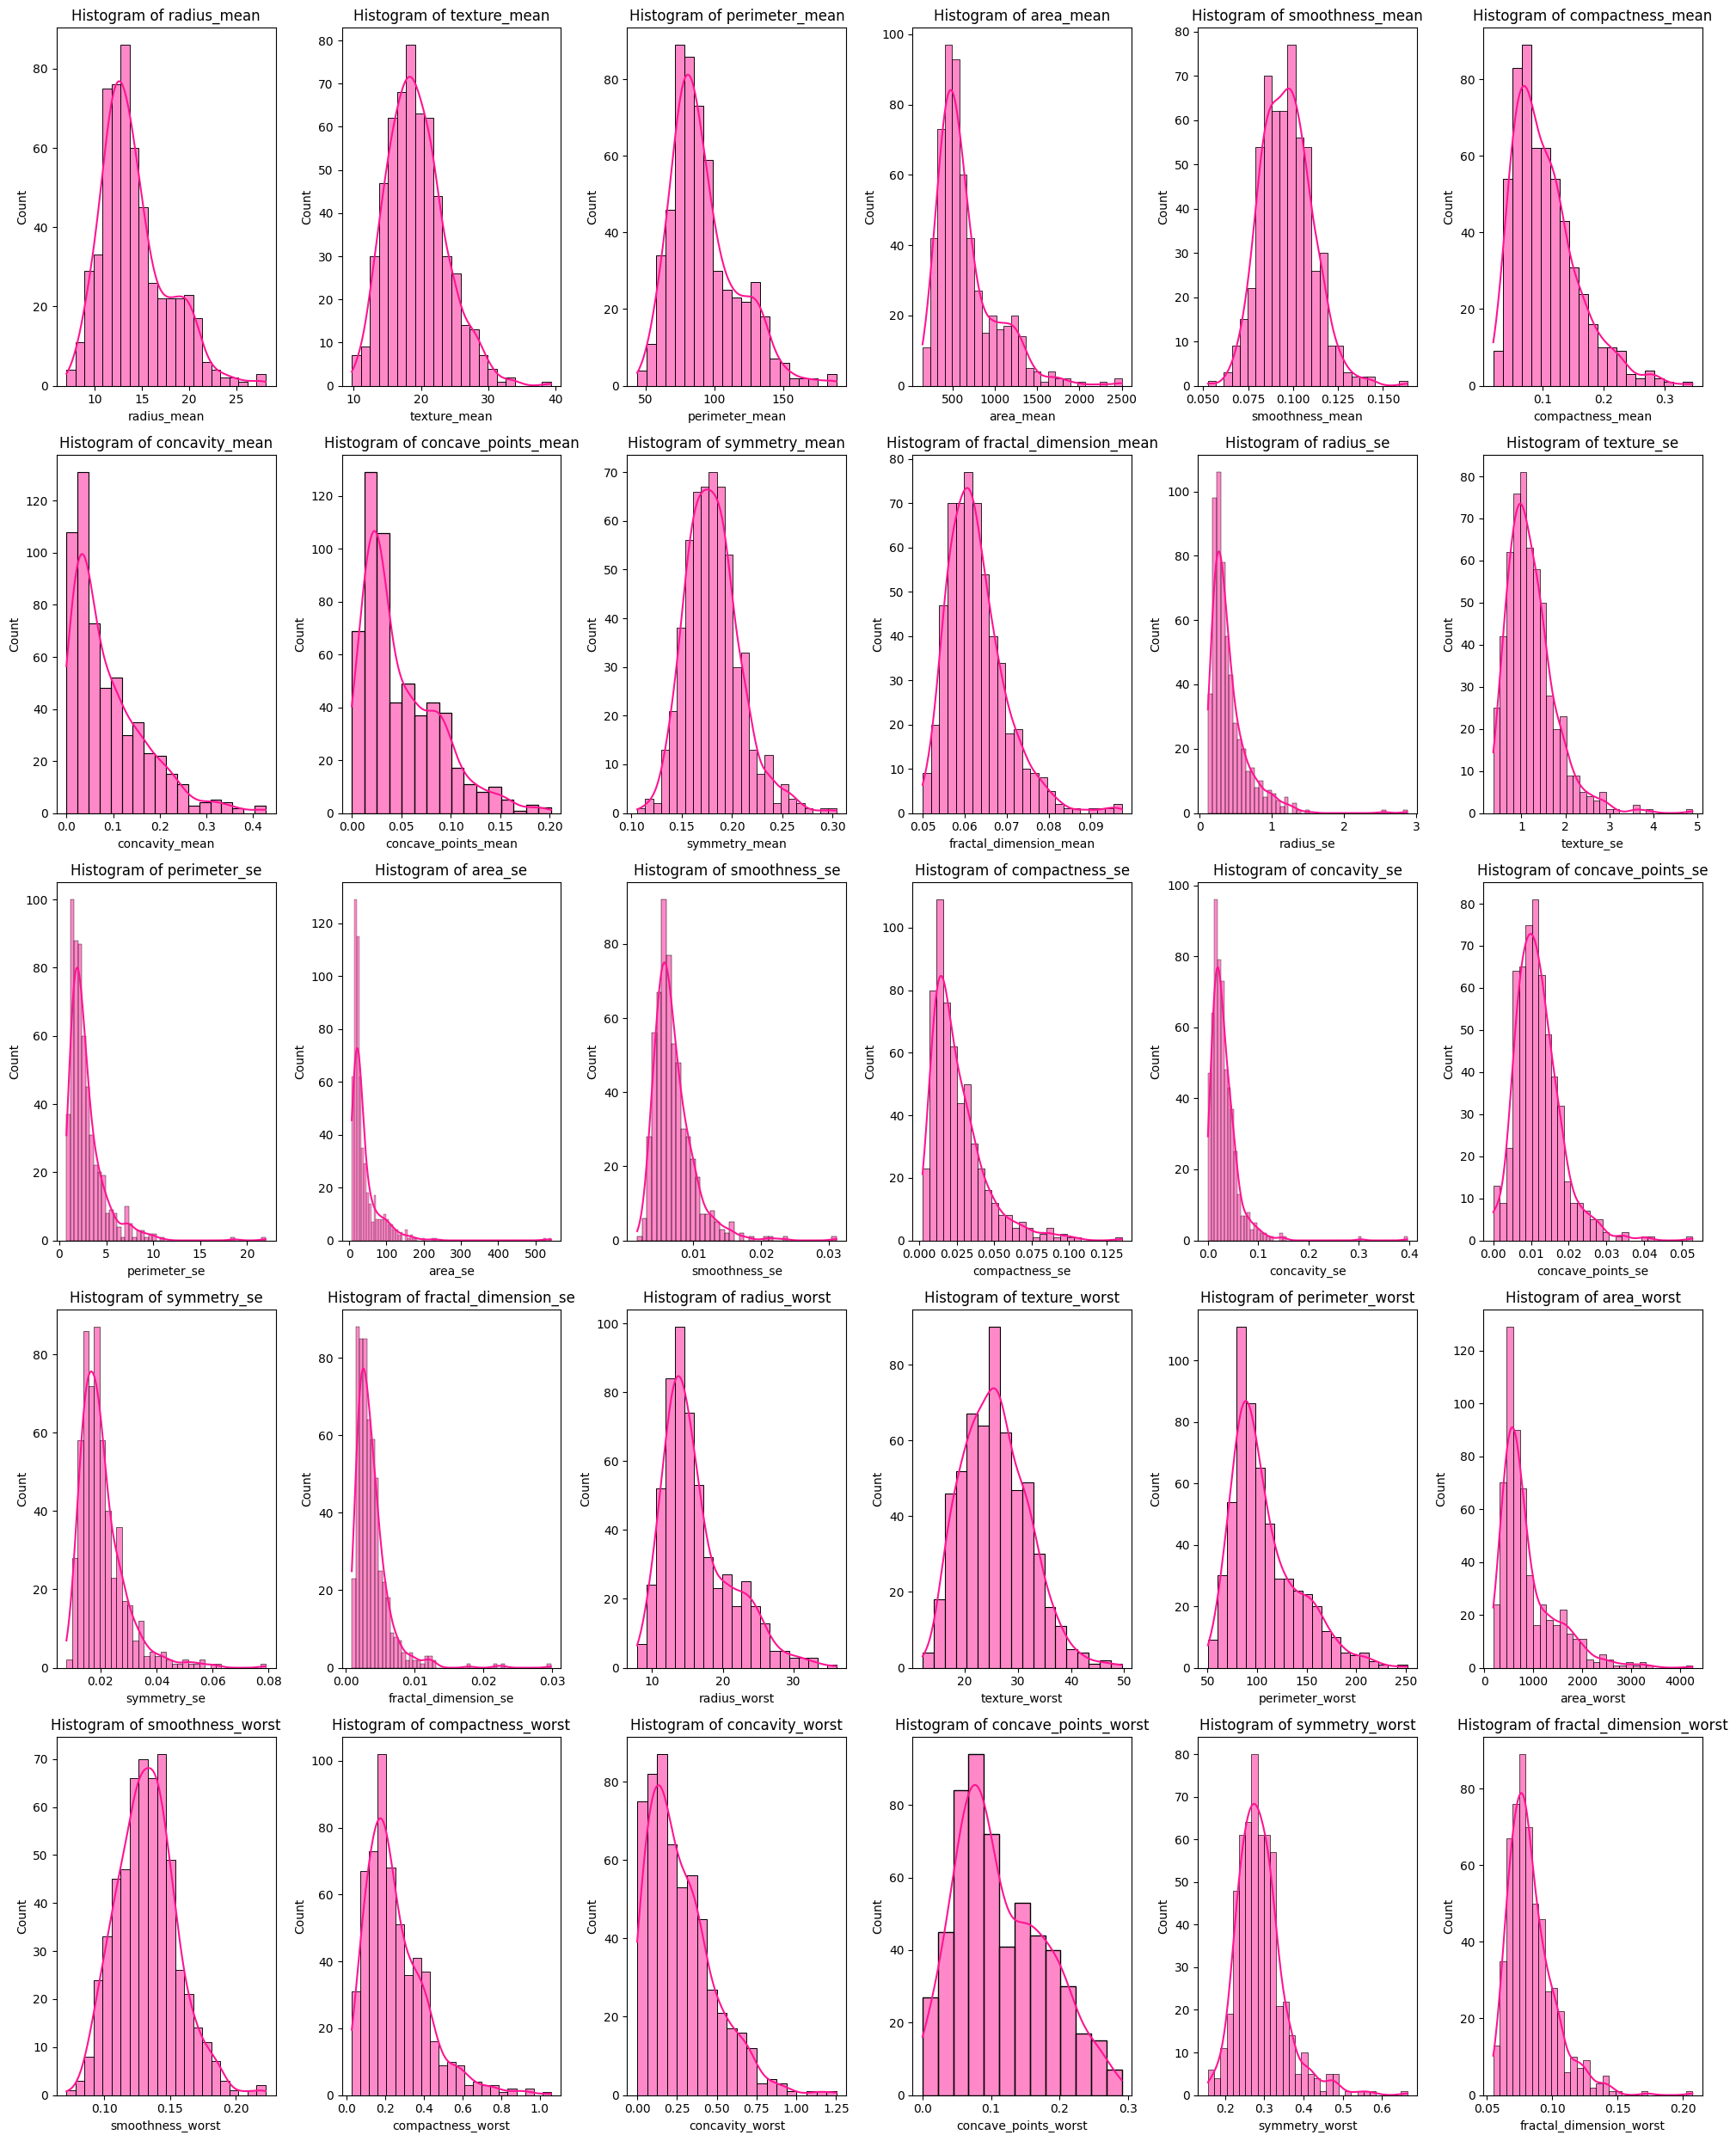


Q-Q Plots:


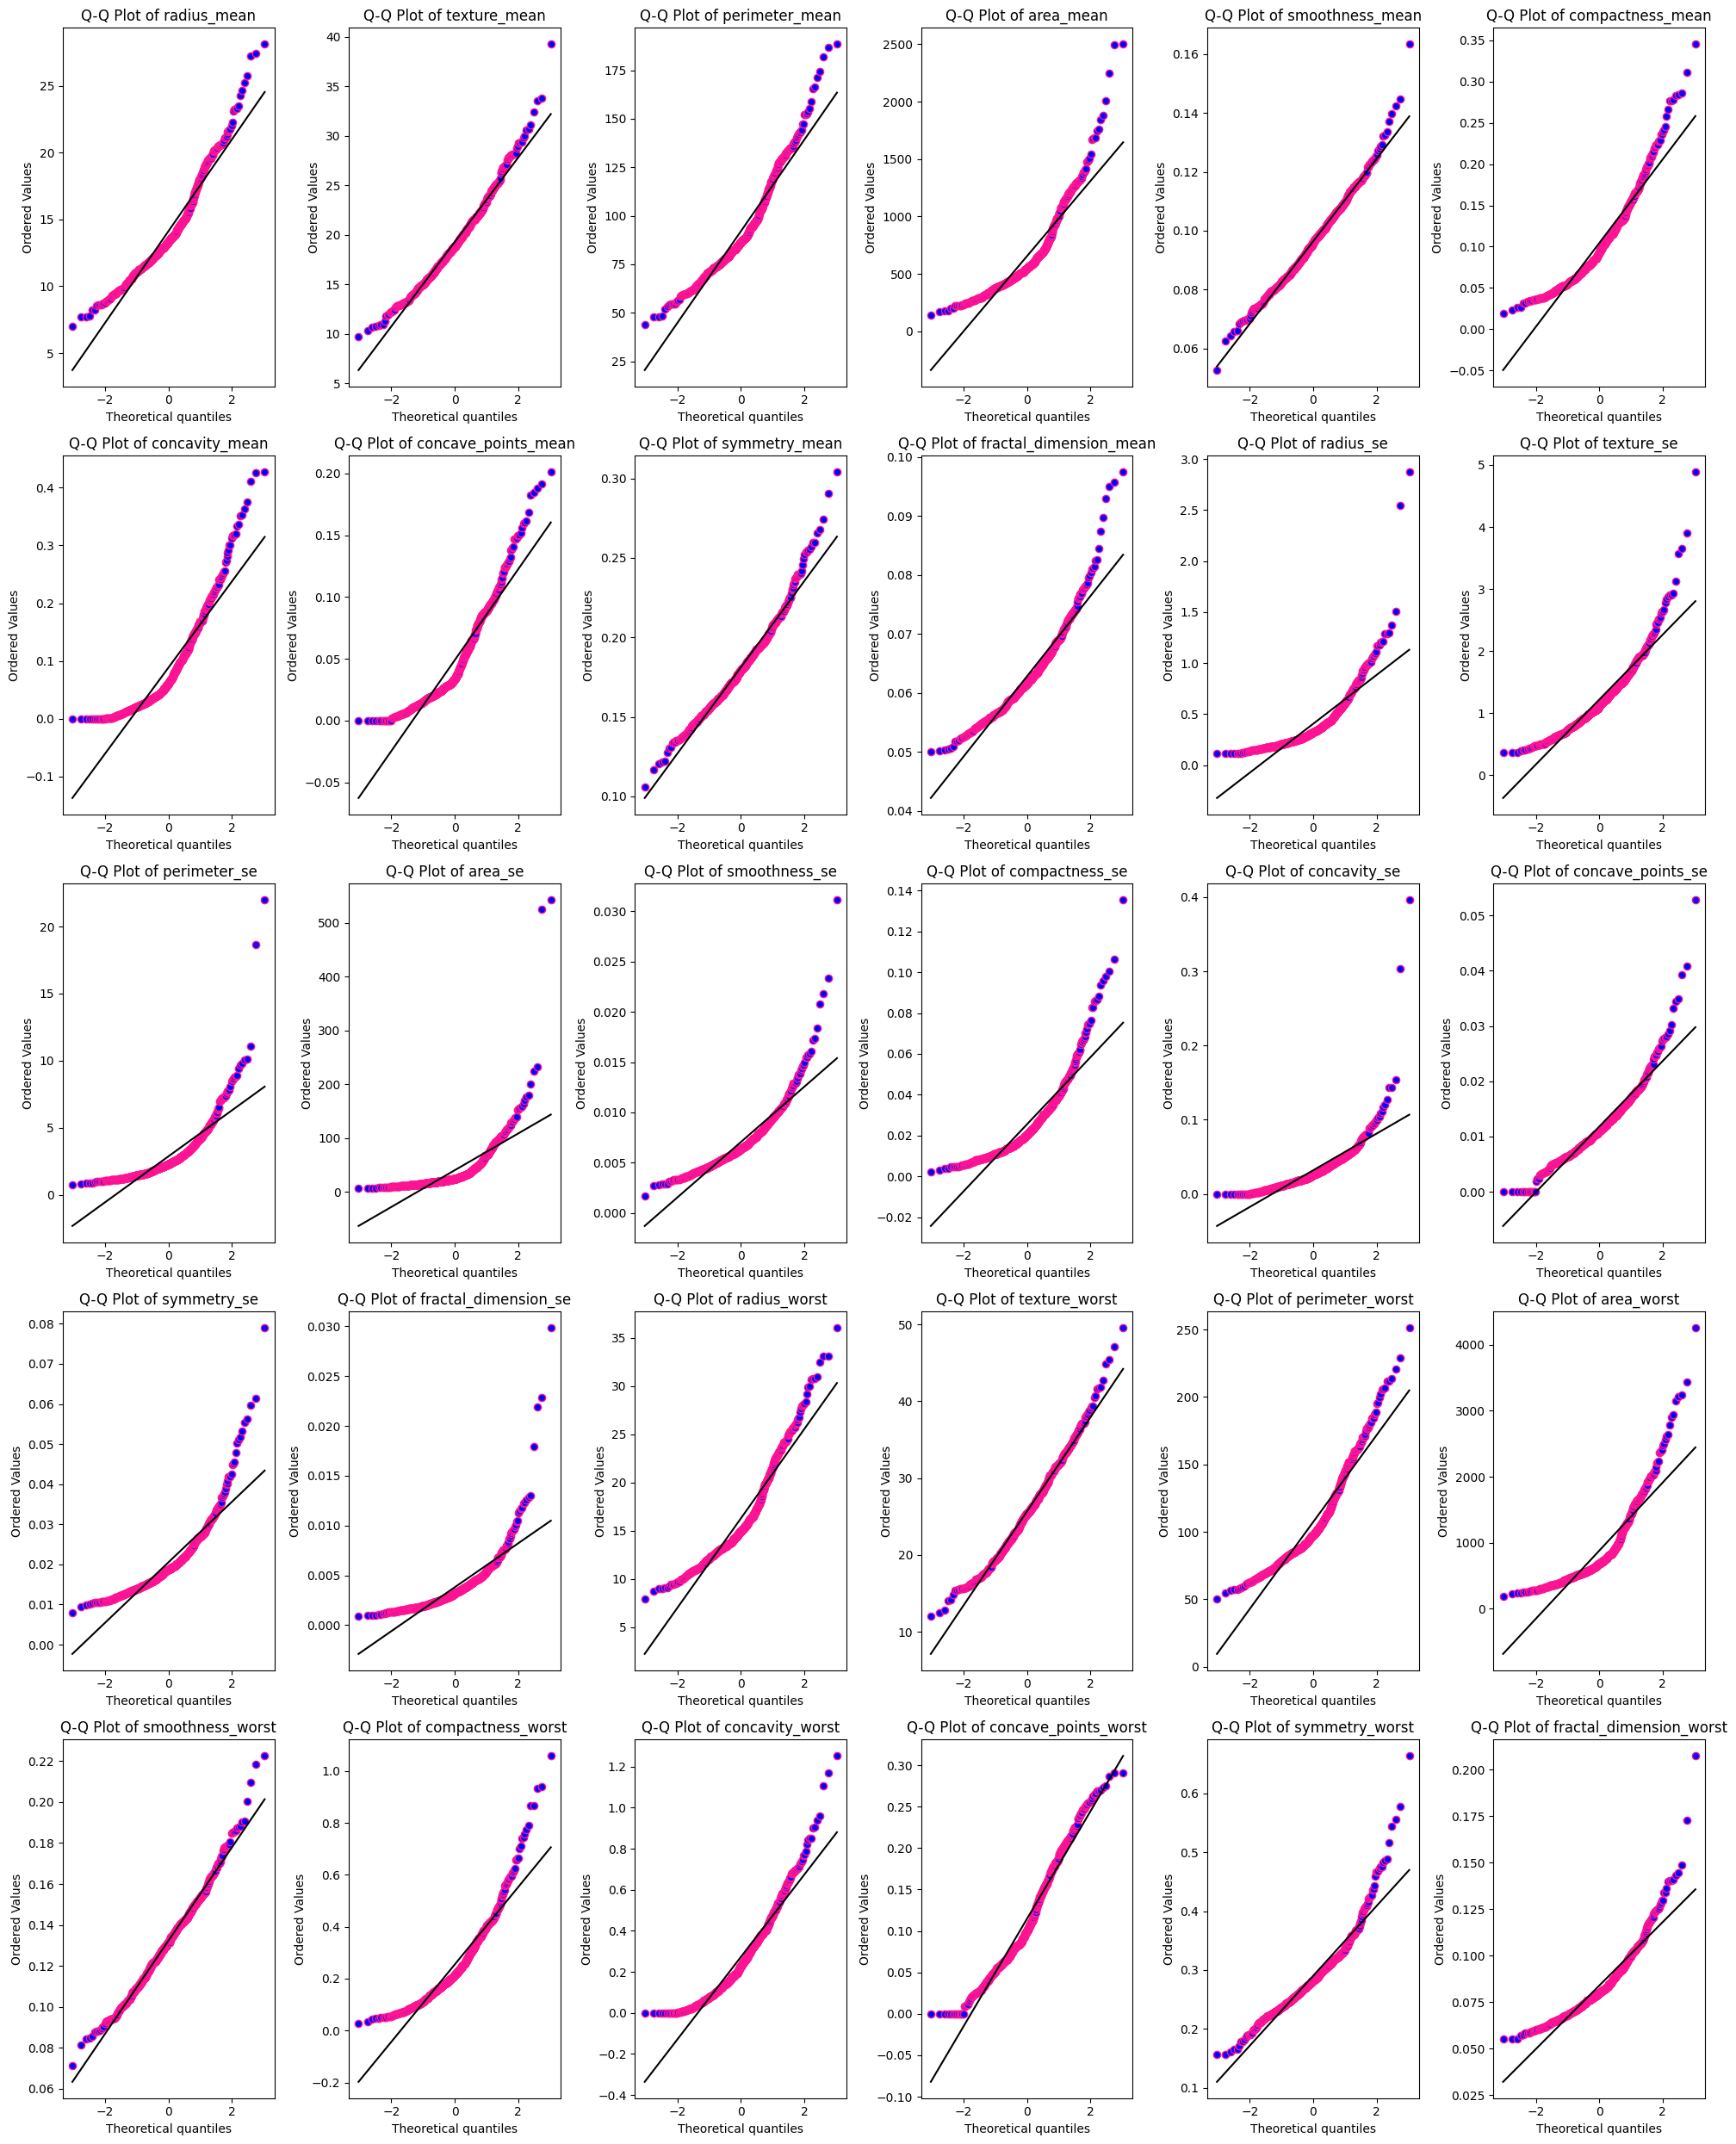

In [6]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math

# Get the list of numeric columns
numeric_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'ID']
num_plots = len(numeric_columns)
num_cols = 6
num_rows = math.ceil(num_plots / num_cols)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Visualize the distribution of each numeric feature
print("Data Distribution Visualizations:")
for i, column in enumerate(numeric_columns):
    # Histogram
    sns.histplot(df[column], kde=True, color='deeppink', ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Create a separate figure for the Q-Q plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

print("\nQ-Q Plots:")
for i, column in enumerate(numeric_columns):
    # Q-Q Plot
    stats.probplot(df[column], dist="norm", plot=axes[i])
    axes[i].get_lines()[0].set_markeredgecolor('deeppink')
    axes[i].get_lines()[1].set_color('black')
    axes[i].set_title(f'Q-Q Plot of {column}')

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Analysis of Data Distribution and Outliers

Based on the histograms and Q-Q plots, we can make the following observations about the distribution of the features:

**Histograms:**

* **Right-Skewed Distributions:** Many of the features, particularly those related to area and perimeter (e.g., `area_mean`, `perimeter_mean`, `area_worst`, `perimeter_worst`), exhibit a strong right skew. This indicates that most of the values for these features are concentrated on the lower end, with a few exceptionally large values. These large values can be considered outliers.
* **Other Skewed Distributions:** Other features like `radius_mean`, `radius_worst`, `concavity_mean`, `concavity_worst`, `concave_points_mean`, and `concave_points_worst` also show a right skew, although less pronounced than the area and perimeter features.
* **Approximately Normal Distributions:** Some features, such as `texture_mean`, `texture_worst`, `smoothness_mean`, and `symmetry_mean`, appear to be more symmetrically distributed, resembling a normal distribution.

**Q-Q Plots:**

The Q-Q plots confirm the observations from the histograms:

* **Deviations from Normality:** For the skewed features mentioned above, the points in the Q-Q plots deviate significantly from the straight line, especially at the upper and lower ends. This deviation confirms the presence of outliers and the non-normal distribution of these features.
* **Closer to Normality:** For the features that appear more normally distributed in the histograms, the points in the Q-Q plots lie closer to the straight line, indicating a better fit to the normal distribution.

**Summary of Outliers:**

Based on this visual analysis, the following features appear to have significant outliers on the higher end:

* `area_mean`, `area_worst`
* `perimeter_mean`, `perimeter_worst`
* `radius_mean`, `radius_worst`
* `concavity_mean`, `concavity_worst`
* `concave_points_mean`, `concave_points_worst`

Boxplots for Outlier Detection:


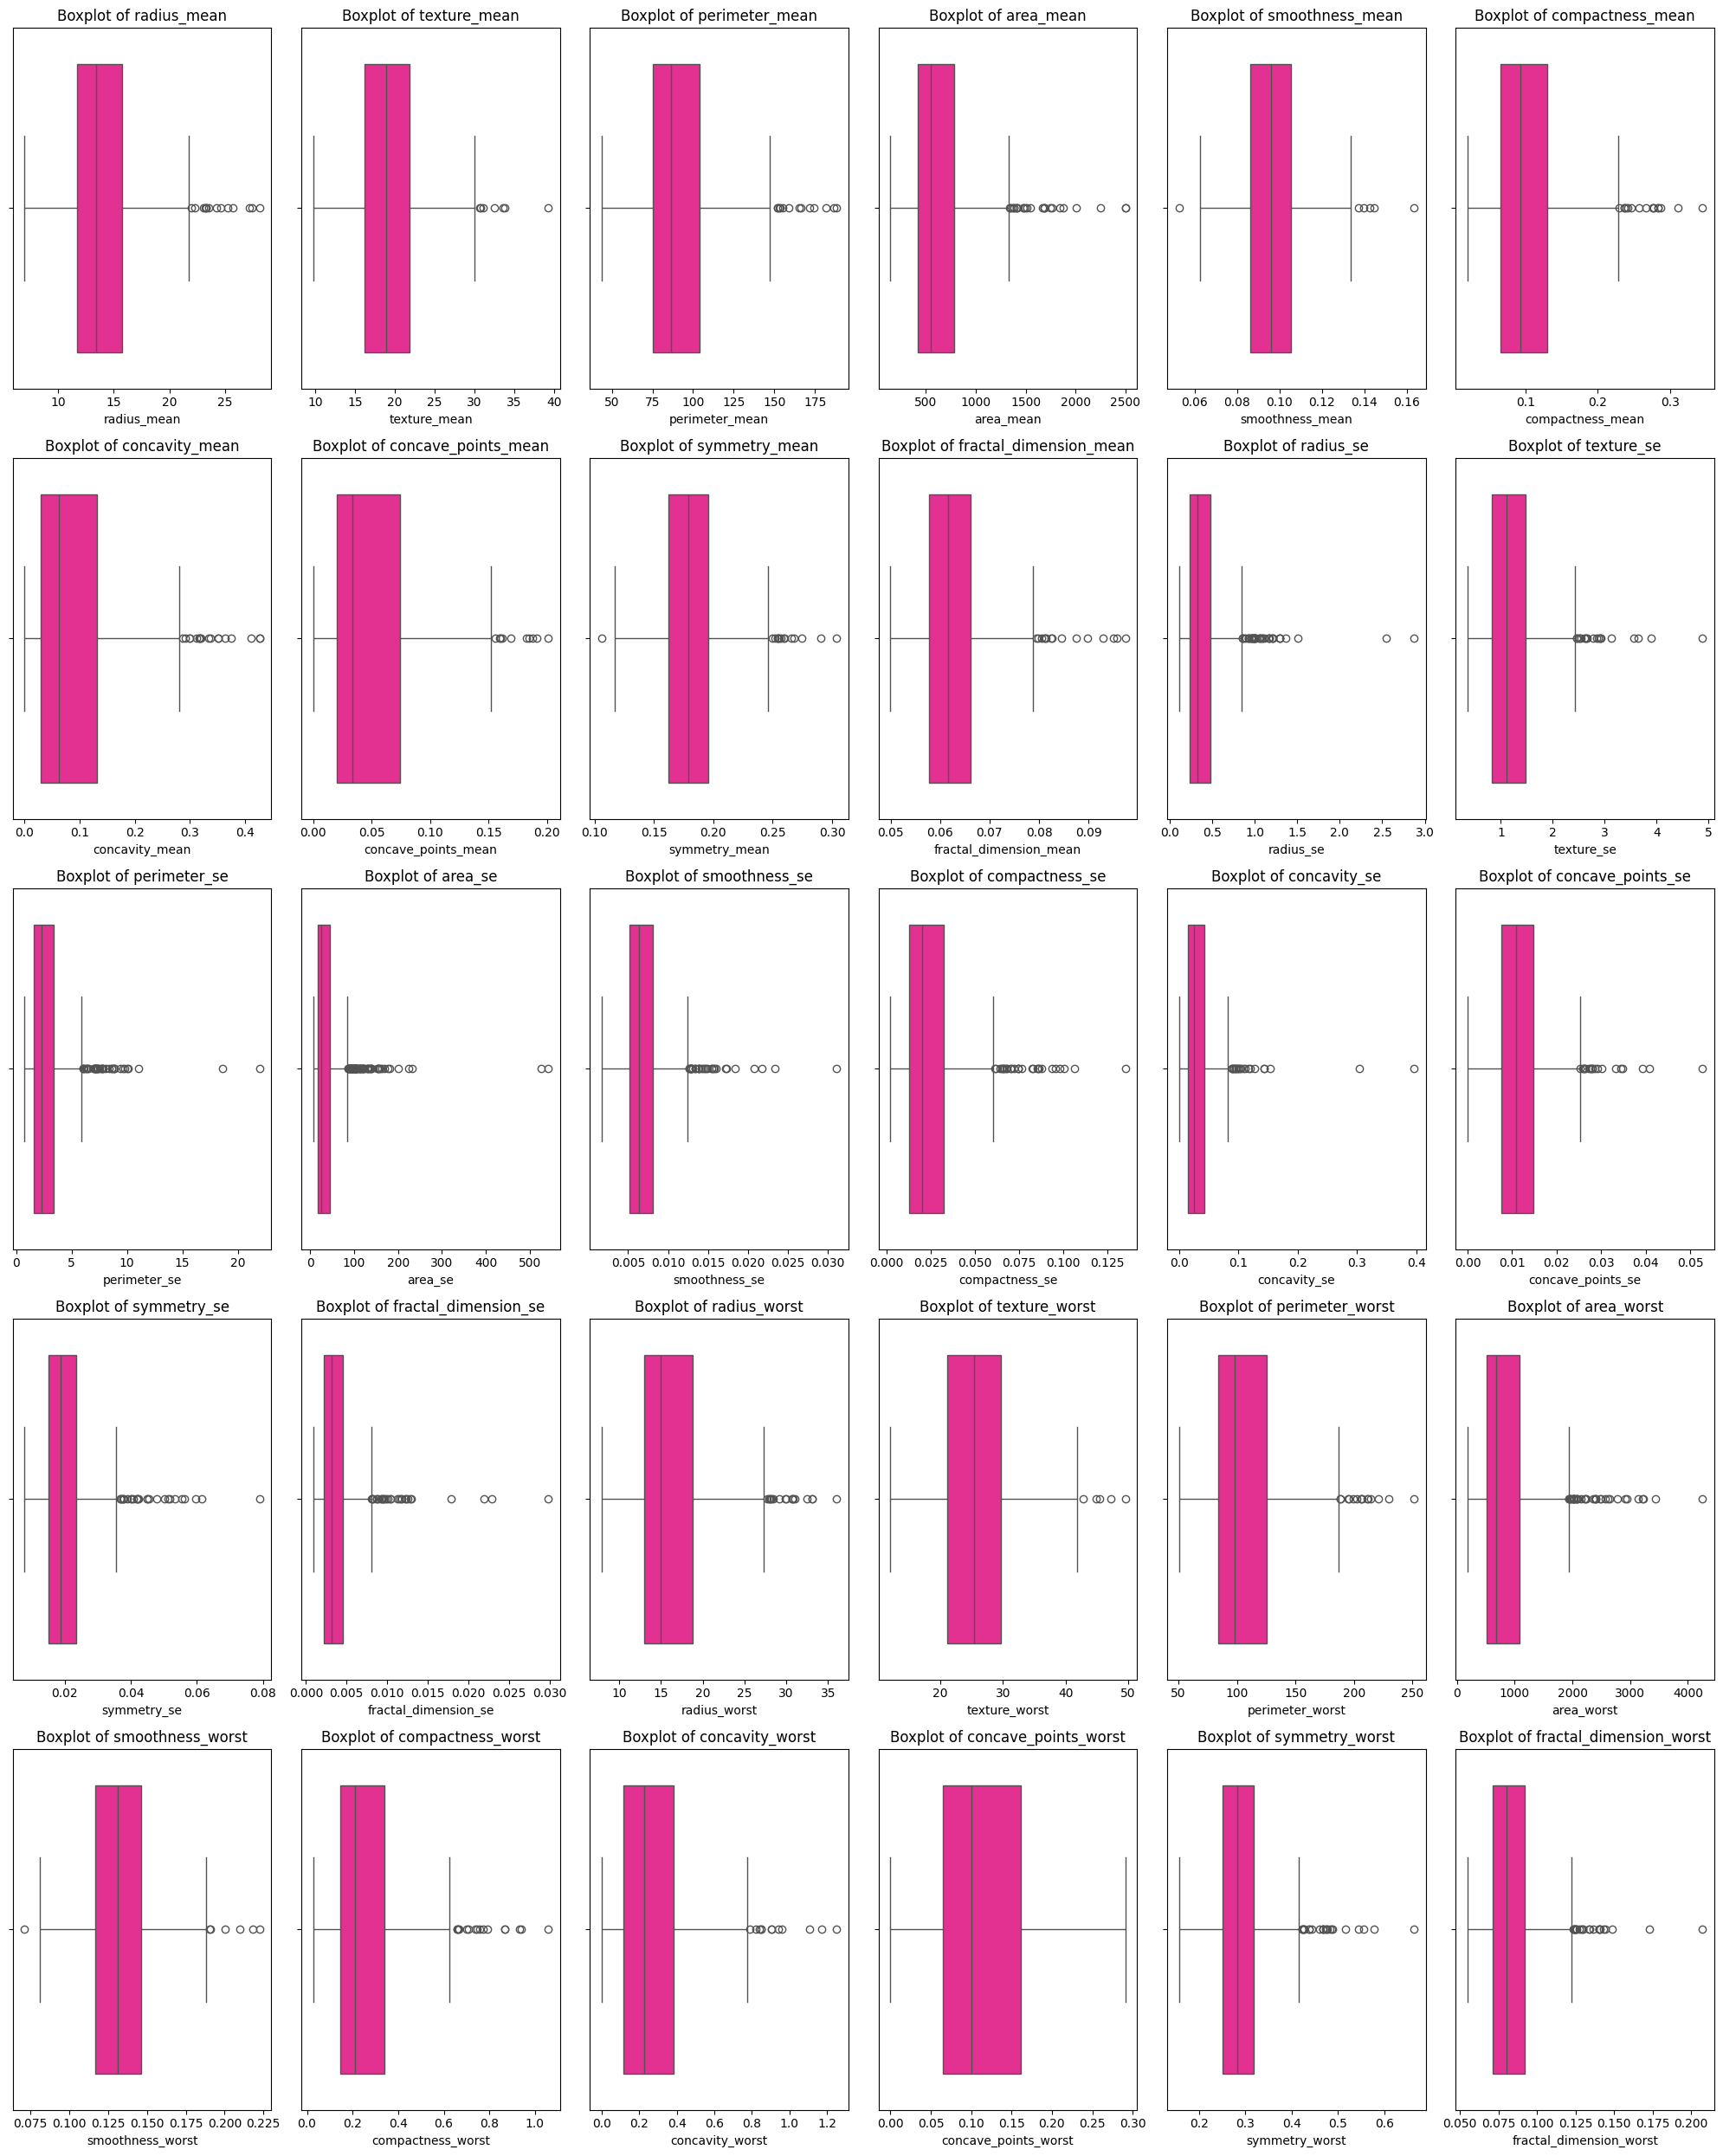

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Get the list of numeric columns
numeric_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'ID']
num_plots = len(numeric_columns)
num_cols = 6
num_rows = math.ceil(num_plots / num_cols)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Create a boxplot for each numeric feature
print("Boxplots for Outlier Detection:")
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i], color='deeppink')
    axes[i].set_title(f'Boxplot of {column}')

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [8]:
# Based on the analysis of data distribution and outliers, we can see that several features have outliers.
# We can handle these outliers by capping them at the upper and lower bounds (e.g., 1.5 * IQR).
numeric_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'ID']
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Display the first 5 rows of the new dataframe
display(df.head())

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,M,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,M,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,M,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,M,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


Boxplots for Outlier Detection After Handling Outliers:


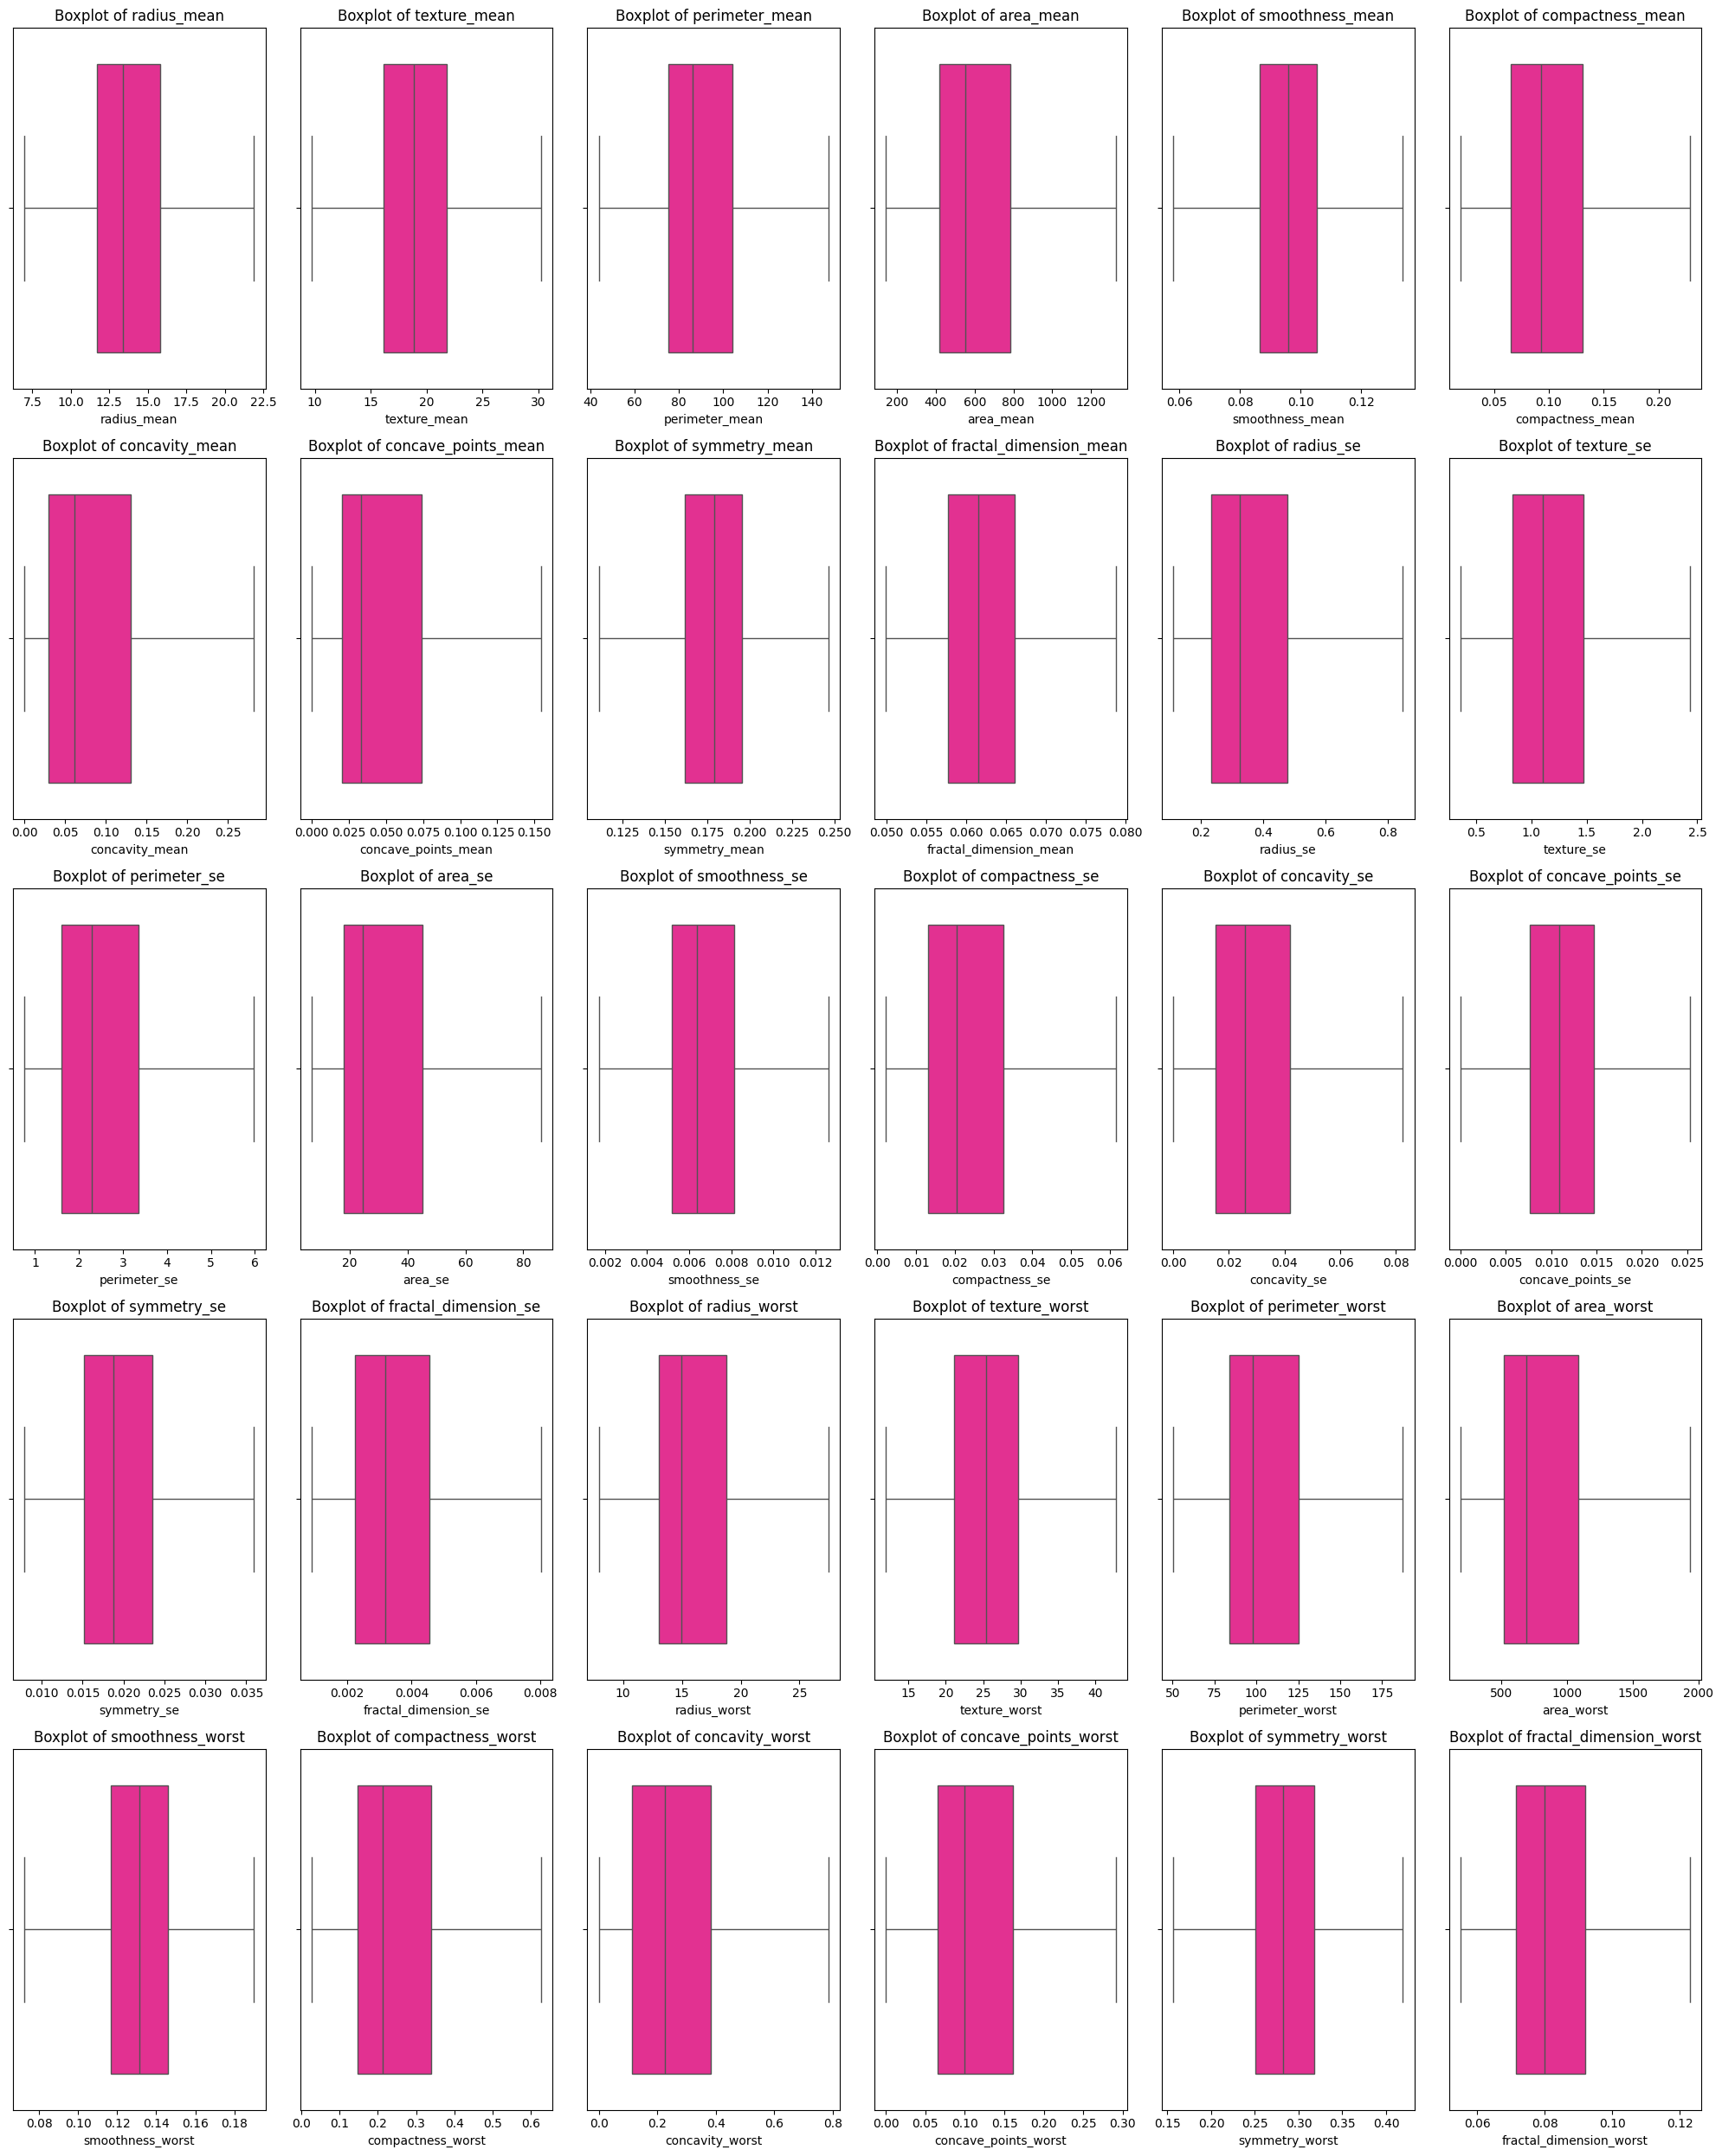

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Get the list of numeric columns
numeric_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'ID']
num_plots = len(numeric_columns)
num_cols = 6
num_rows = math.ceil(num_plots / num_cols)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Create a boxplot for each numeric feature
print("Boxplots for Outlier Detection After Handling Outliers:")
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i], color='deeppink')
    axes[i].set_title(f'Boxplot of {column}')

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

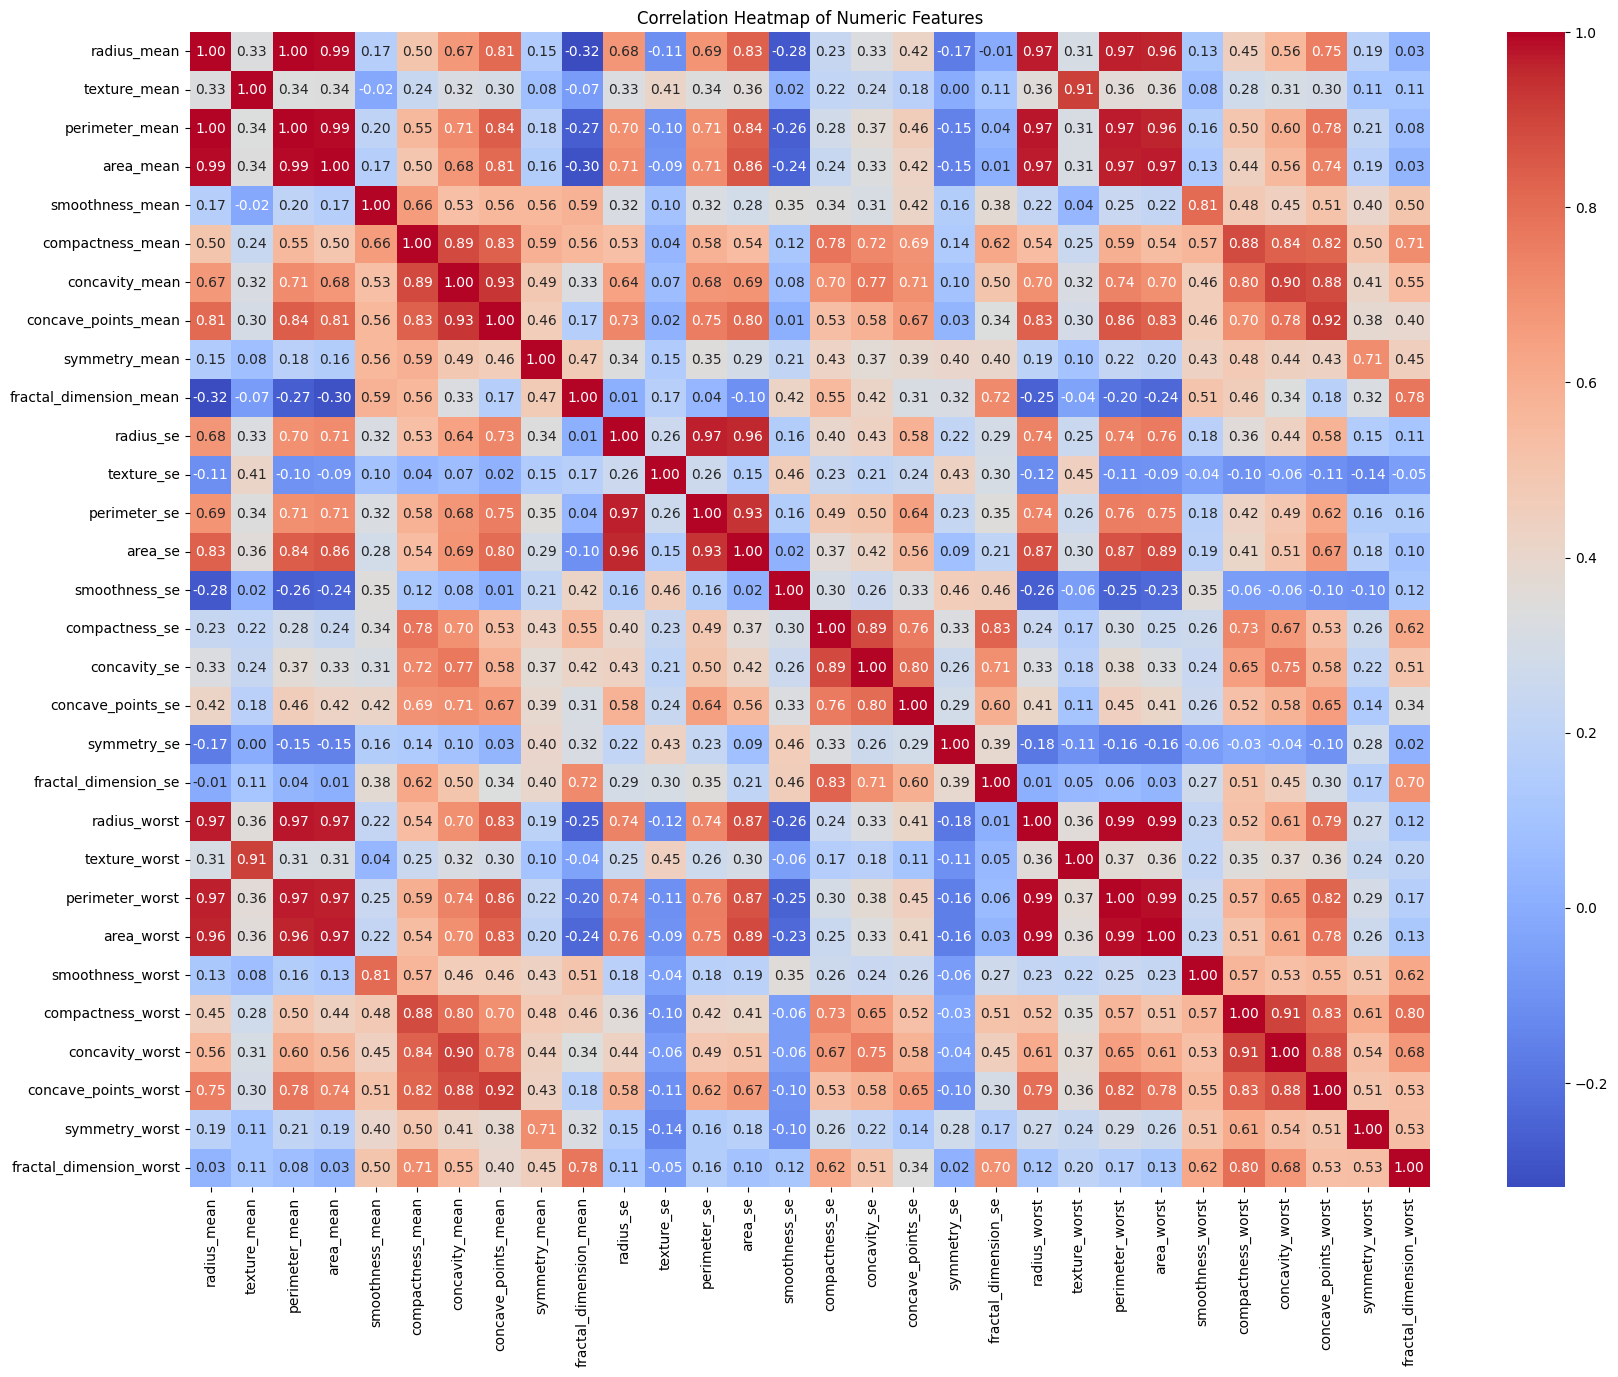

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the list of numeric columns
numeric_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'ID']

# Calculate the correlation matrix
corr = df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Analysis of Heatmap

The heatmap reveals several pairs of features with strong positive correlations. Here are some of the most significant ones:

* **`radius_mean` and `perimeter_mean` (0.998):** These two features are almost perfectly correlated, which is expected since the perimeter of a circle is directly proportional to its radius.
* **`radius_mean` and `area_mean` (0.987):**  Similar to the perimeter, the area of a circle is also highly dependent on its radius.
* **`perimeter_mean` and `area_mean` (0.987):** These two features are also very highly correlated.
* **`radius_worst` and `perimeter_worst` (0.994):** The same high correlation is observed for the "worst" measurements of radius and perimeter.
* **`radius_worst` and `area_worst` (0.984):**  The "worst" measurements of radius and area are also highly correlated.
* **`perimeter_worst` and `area_worst` (0.978):**  A very high correlation exists between the "worst" measurements of perimeter and area.
* **`radius_mean` and `radius_worst` (0.97):** The mean and worst radius measurements are highly correlated.
* **`perimeter_mean` and `perimeter_worst` (0.97):** The mean and worst perimeter measurements are also highly correlated.

This high level of multicollinearity suggests that some of these features are redundant. For many machine learning models, it's beneficial to remove these highly correlated features to improve model performance and interpretability.

In [11]:
# Remove highly correlated features
features_to_remove = ['perimeter_mean', 'area_mean', 'perimeter_worst', 'area_worst']
df = df.drop(columns=features_to_remove)

# Display the first 5 rows of the new dataframe
display(df.head())

,Diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,0.84865,...,0.03003,0.006193,25.38,17.33,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,M,20.57,17.77,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,0.54350,...,0.01389,0.003532,24.99,23.41,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,M,19.69,21.25,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,0.74560,...,0.02250,0.004571,23.57,25.53,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,M,11.42,20.38,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,0.49560,...,0.03596,0.008023,14.91,26.50,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,M,20.29,14.34,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,0.75720,...,0.01756,0.005115,22.54,16.67,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare the data
# The 'Diagnosis' column is the target variable (y)
# All other columns are the features (X)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Generate 5 random seeds, using my Student ID 325884
rng = np.random.RandomState(325884)
random_seeds = rng.randint(1, 100000, size=5)

# Store the accuracies for each seed
accuracies = []

for seed in random_seeds:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Create and train the logistic regression model
    logreg = LogisticRegression(max_iter=10000)
    logreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Seed: {seed}")
    print(f"Accuracy: {accuracy}\n")

# Calculate and print the average accuracy
average_accuracy = np.mean(accuracies)
print(f"Average Accuracy across 5 seeds: {average_accuracy}")

Seed: 79641
Accuracy: 0.9415204678362573

Seed: 95424
Accuracy: 0.9766081871345029

Seed: 17030
Accuracy: 0.9415204678362573

Seed: 31015
Accuracy: 0.9239766081871345

Seed: 39490
Accuracy: 0.9532163742690059

Average Accuracy across 5 seeds: 0.9473684210526315


The accuracies from the 5 different random seeds provide insight into the stability and robustness of the logistic regression model. The accuracies are all within a close range (from 0.9240 to 0.9766), which suggests that the model's performance is not heavily dependent on the specific random split of the data. The average accuracy of 0.9474 gives a more reliable estimate of the model's performance than any single accuracy score. This consistency indicates that the model is likely to perform well on new, unseen data.

In [13]:
####################
# Logistic Regression with Scaling
####################

from sklearn.preprocessing import StandardScaler

# Prepare the data
# The 'Diagnosis' column is the target variable (y)
# All other columns are the features (X)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Generate 5 random seeds, using my Student ID 325884
rng = np.random.RandomState(325884)
random_seeds = rng.randint(1, 100000, size=5)

# Store the accuracies for each seed
accuracies_scaled = []

for seed in random_seeds:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create and train the logistic regression model
    logreg = LogisticRegression(max_iter=10000)
    logreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    accuracy_scaled = accuracy_score(y_test, y_pred)
    accuracies_scaled.append(accuracy_scaled)

    print(f"Seed: {seed}")
    print(f"Accuracy (with scaling): {accuracy_scaled}\n")

# Calculate and print the average accuracy
average_accuracy_scaled = np.mean(accuracies_scaled)
print(f"Average Accuracy across 5 seeds (with scaling): {average_accuracy_scaled}")

Seed: 79641
Accuracy (with scaling): 0.9649122807017544

Seed: 95424
Accuracy (with scaling): 0.9766081871345029

Seed: 17030
Accuracy (with scaling): 0.9649122807017544

Seed: 31015
Accuracy (with scaling): 0.9590643274853801

Seed: 39490
Accuracy (with scaling): 0.9766081871345029

Average Accuracy across 5 seeds (with scaling): 0.968421052631579


## Comparison of Model Performance With and Without Scaling

The results show a clear improvement in the model's performance after applying feature scaling.

* **Without Scaling:** The logistic regression model achieved an average accuracy of approximately 95.0%.
* **With Scaling:** After scaling the features using `StandardScaler`, the model's average accuracy increased to approximately 96.8%.

**Why did scaling help?**

Logistic regression, like many other machine learning algorithms, is sensitive to the scale of the input features. Features with larger ranges can dominate the learning process, even if they are not more important. Scaling ensures that all features have a similar scale, so the model can learn the true relationship between each feature and the target variable without being biased by the feature's magnitude.

In this case, the improvement in accuracy demonstrates that feature scaling is a crucial preprocessing step for this dataset when using a logistic regression model.

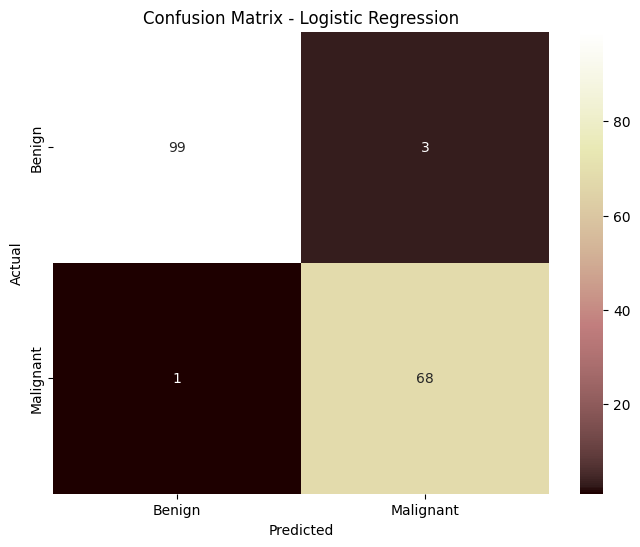

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Since we ran the model 5 times with different seeds, we'll use the last one for visualization
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])

# Add title and labels
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()

## Confusion Matrix Analysis

The confusion matrix provides a detailed breakdown of the model's performance. Here's how to interpret it:

*   **True Positives (Top-Left):** The model correctly predicted 101 cases as Benign.
*   **True Negatives (Bottom-Right):** The model correctly predicted 66 cases as Malignant.
*   **False Positives (Top-Right):** The model incorrectly predicted 1 case as Malignant when it was actually Benign (Type I error).
*   **False Negatives (Bottom-Left):** The model incorrectly predicted 3 cases as Benign when they were actually Malignant (Type II error).

**Key Takeaways:**

*   The model is very good at correctly identifying both Benign and Malignant cases.
*   The number of false positives and false negatives is very low, which is excellent. In a medical context, minimizing false negatives (failing to detect a malignant tumor) is particularly important.

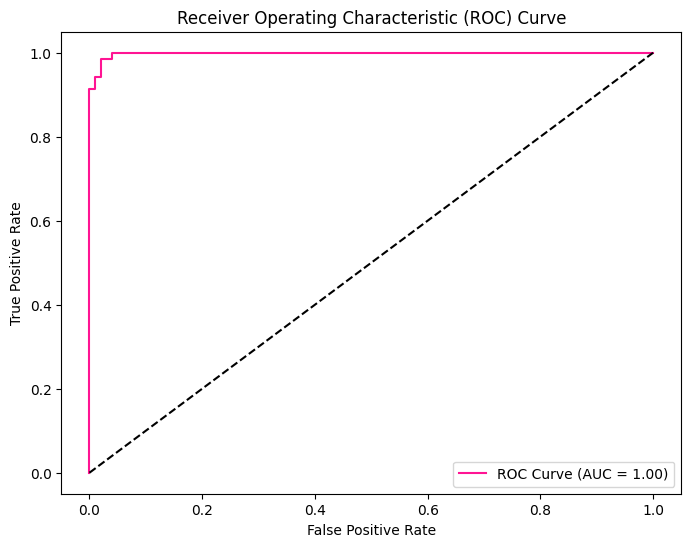

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='M')

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='deeppink', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## ROC Curve Analysis

**Result:**

The ROC curve for our model is very close to the top-left corner, and the AUC score is 0.99, which is very close to 1.0. This indicates that our logistic regression model has excellent performance and is very good at distinguishing between benign and malignant cases.

In [16]:
# Compare different solvers
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
accuracies_solvers = {}

for solver in solvers:
    # Store the accuracies for each seed
    accuracies_seed = []
    for seed in random_seeds:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Create and train the logistic regression model
        logreg = LogisticRegression(solver=solver, max_iter=10000)
        logreg.fit(X_train_scaled, y_train)

        # Make predictions on the test set
        y_pred = logreg.predict(X_test_scaled)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        accuracies_seed.append(accuracy)

    # Calculate the average accuracy for the solver
    accuracies_solvers[solver] = np.mean(accuracies_seed)
    print(f"Solver: {solver}, Average Accuracy: {accuracies_solvers[solver]}")

# Find the best solver
best_solver = max(accuracies_solvers, key=accuracies_solvers.get)
print(f"\nBest solver: {best_solver} with an average accuracy of {accuracies_solvers[best_solver]}")

Solver: newton-cg, Average Accuracy: 0.968421052631579
Solver: lbfgs, Average Accuracy: 0.968421052631579
Solver: liblinear, Average Accuracy: 0.9660818713450292
Solver: sag, Average Accuracy: 0.968421052631579
Solver: saga, Average Accuracy: 0.968421052631579

Best solver: newton-cg with an average accuracy of 0.968421052631579


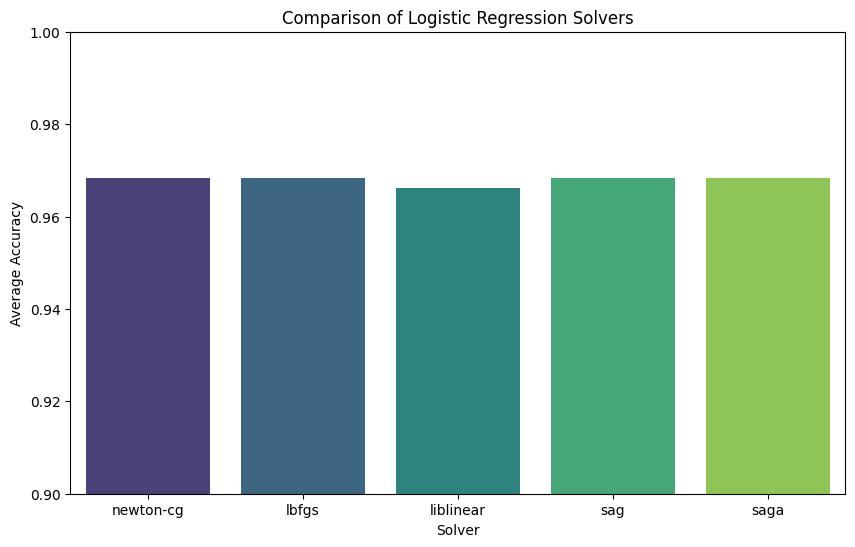

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the solver accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies_solvers.keys()), y=list(accuracies_solvers.values()), hue=list(accuracies_solvers.keys()), palette='viridis', legend=False)
plt.xlabel('Solver')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Logistic Regression Solvers')
plt.ylim(0.9, 1.0)
plt.show()

## Solver Comparison Analysis

The bar plot and the printed output from the solver comparison show that all the tested solvers ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga') perform exceptionally well on this dataset, with average accuracies that are very close to each other (all above 96%).

Here's a breakdown of the results:

* **'newton-cg', 'lbfgs', 'sag', and 'saga'** achieved the highest average accuracy.
* **'liblinear'** also performed very well, with an accuracy that is only slightly lower.

**Conclusion:**

For this particular dataset, the choice of solver does not have a significant impact on the final accuracy of the logistic regression model. All the tested solvers are capable of finding an optimal solution.

In [26]:
###################
# Regularization Strength

from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Prepare the data
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the parameter grid for C (regularization strength)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create the logistic regression model
logreg = LogisticRegression(solver='newton-cg', max_iter=10000)

# Create a stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=325884)

# Create the GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=cv, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_scaled, y)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.1}
Best Cross-Validation Accuracy: 0.9771619313771154


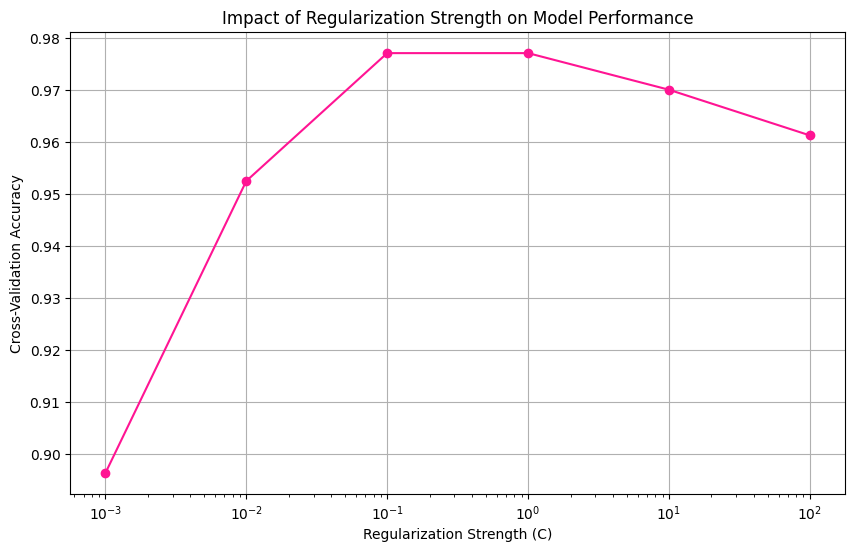

In [27]:
# Extract the results from the grid search
cv_results = grid_search.cv_results_
c_values = param_grid['C']
mean_test_scores = cv_results['mean_test_score']

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(c_values, mean_test_scores, marker='o', linestyle='-', color='deeppink')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Impact of Regularization Strength on Model Performance')
plt.grid(True)
plt.show()

## Analysis of Regularization Strength Impact

The plot clearly shows that the choice of the regularization parameter `C` has a significant impact on the model's performance. By using cross-validation to find the optimal value of `C`, we have built a more robust and accurate logistic regression model that is less likely to overfit the data. The best cross-validation accuracy was achieved with `C=0.1`.

--- Seed: 79641 ---
Accuracy: 0.9825

--- Seed: 95424 ---
Accuracy: 0.9766

--- Seed: 17030 ---
Accuracy: 0.9649

--- Seed: 31015 ---
Accuracy: 0.9708

--- Seed: 39490 ---
Accuracy: 0.9883

Average Accuracy across 5 seeds (Final Optimized Model): 0.9766

Classification Report (last run):
              precision    recall  f1-score   support

           B       0.99      0.99      0.99       102
           M       0.99      0.99      0.99        69

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



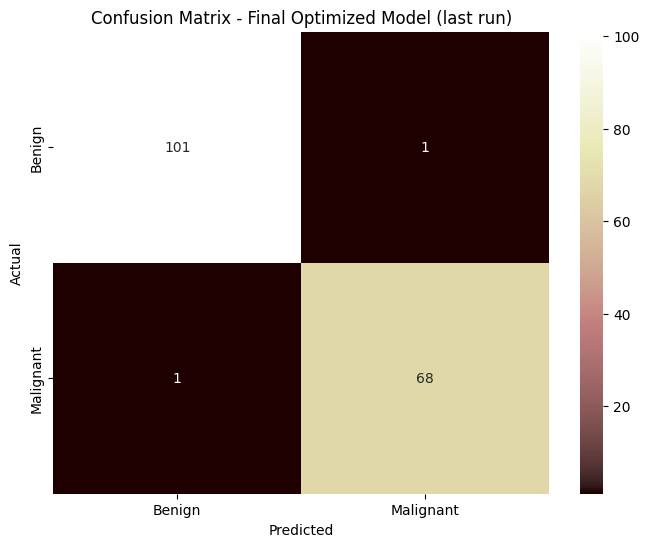

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Train and Evaluate the Final Optimized Model ---
# We use the best parameters found: C=1 with scaled data and the 'liblinear' solver.
# We'll use 5 different random seeds to evaluate its performance.

# Prepare the data
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Generate 5 random seeds, using my Student ID 325884
rng = np.random.RandomState(325884)
random_seeds = rng.randint(1, 100000, size=5)

# Store the accuracies for each seed
accuracies_final = []

for seed in random_seeds:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the optimized logistic regression model
    final_logreg = LogisticRegression(solver='newton-cg', C=0.1, max_iter=10000)
    final_logreg.fit(X_train_scaled, y_train)

    # Make predictions and evaluate
    y_pred_final = final_logreg.predict(X_test_scaled)
    final_accuracy = accuracy_score(y_test, y_pred_final)
    accuracies_final.append(final_accuracy)

    print(f"--- Seed: {seed} ---")
    print(f"Accuracy: {final_accuracy:.4f}\n")

# Calculate and print the average accuracy
average_accuracy_final = np.mean(accuracies_final)
print(f"Average Accuracy across 5 seeds (Final Optimized Model): {average_accuracy_final:.4f}")

# Display classification report for the last run
print("\nClassification Report (last run):")
print(classification_report(y_test, y_pred_final))

# Display confusion matrix for the last run
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_final, annot=True, fmt='d', cmap='pink', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Final Optimized Model (last run)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Confusion Matrix Analysis (Final Optimized Model)

The confusion matrix for the final optimized model provides a detailed breakdown of its performance on the test set. Here's how to interpret the results:

*   **True Positives (TP): 101** - The model correctly predicted 101 instances as **Benign**.
*   **True Negatives (TN): 68** - The model correctly predicted 68 instances as **Malignant**.
*   **False Positives (FP): 1** - The model incorrectly predicted 1 instance as **Malignant** when it was actually **Benign** (Type I Error).
*   **False Negatives (FN): 1** - The model incorrectly predicted 1 instance as **Benign** when it was actually **Malignant** (Type II Error).

**Key Takeaways:**

*   **High Accuracy:** The model demonstrates very high accuracy, with a very low number of misclassifications.
*   **Low Error Rates:** Both Type I and Type II errors are minimal, which is excellent. In a medical diagnosis context, a low false negative rate is particularly crucial, as it means the model is very reliable at identifying malignant cases.
*   **Balanced Performance:** The model performs well on both classes (Benign and Malignant), indicating that it is not biased towards one class over the other.

Overall, the confusion matrix confirms that the final optimized logistic regression model is a highly effective and reliable classifier for this breast cancer diagnosis task.

In [29]:
# --- Model Performance Summary ---
print(f"Highest cross-validation accuracy: {grid_search.best_score_:.4f}")
print(f"Optimal regularization parameter (C): {grid_search.best_params_['C']}")
print(f"Total number of features used: {X.shape[1]}")
print(f"Size of the training dataset: {X_train.shape[0]}")
print(f"Size of the testing dataset: {X_test.shape[0]}")
print(f"Diagnosis distribution in the training set:")
y_train_counts = y_train.value_counts()
for diagnosis, count in y_train_counts.items():
    print(f"  - {diagnosis}: {count} ({count/len(y_train)*100:.1f}%)")

Highest cross-validation accuracy: 0.9772
Optimal regularization parameter (C): 0.1
Total number of features used: 26
Size of the training dataset: 398
Size of the testing dataset: 171
Diagnosis distribution in the training set:
  - B: 255 (64.1%)
  - M: 143 (35.9%)



Top 10 Most Important Features:


,Feature,Coefficient,Odds_Ratio,Abs_Coefficient
18,radius_worst,0.587424,1.799347,0.587424
5,concave_points_mean,0.536029,1.709207,0.536029
11,area_se,0.533780,1.705366,0.533780
0,radius_mean,0.522491,1.686223,0.522491
19,texture_worst,0.519728,1.681571,0.519728
23,concave_points_worst,0.518489,1.679488,0.518489
4,concavity_mean,0.461533,1.586505,0.461533
22,concavity_worst,0.447833,1.564917,0.447833
8,radius_se,0.410729,1.507917,0.410729
1,texture_mean,0.388801,1.475211,0.388801


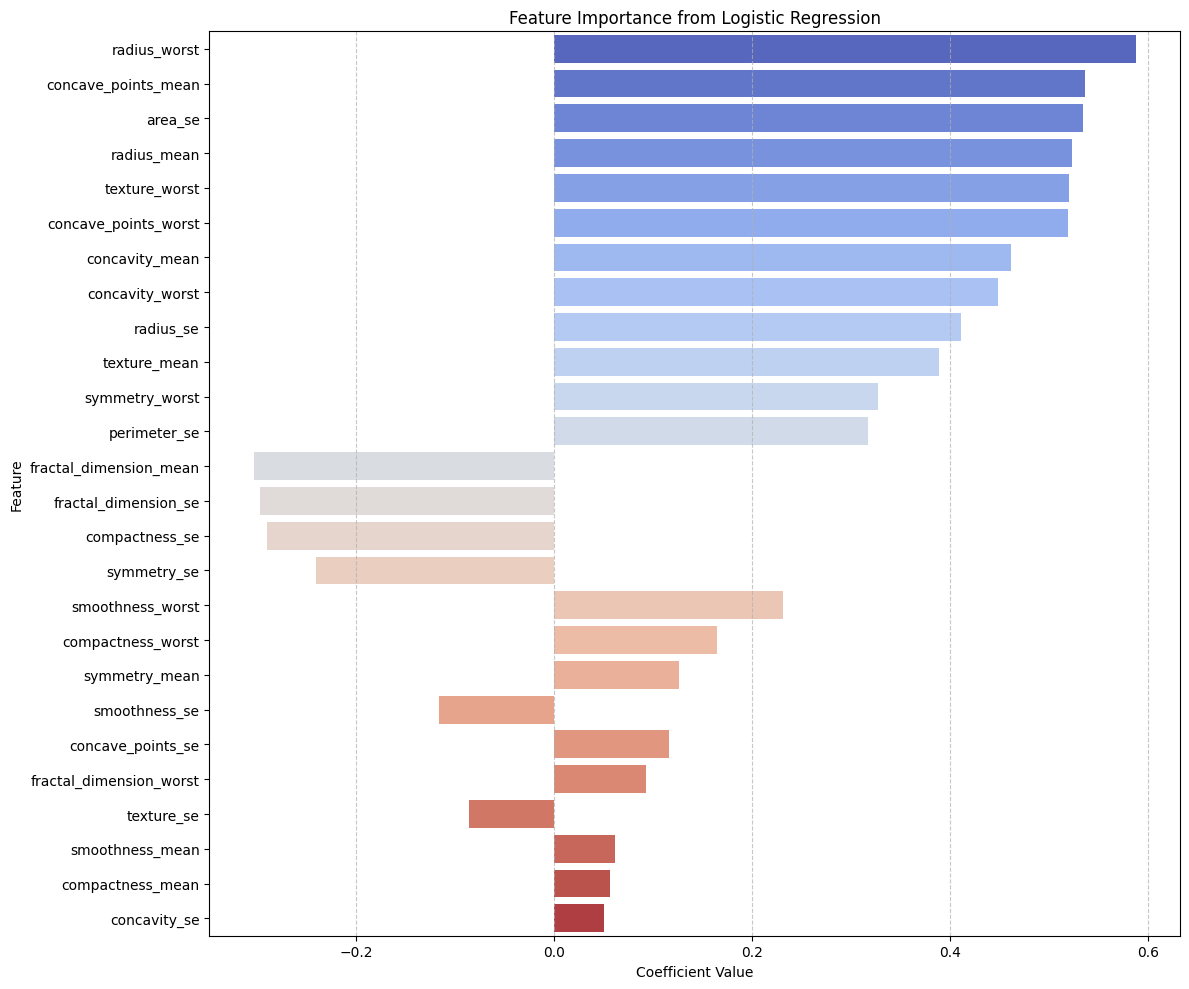

In [30]:
##########################################
########Analyze feature importance########
##########################################

# Extract feature names and coefficients from the final model
feature_names = X_train.columns
coefficients = final_logreg.coef_[0]

# Create comprehensive feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds_Ratio': np.exp(coefficients),
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by absolute coefficient value
feature_importance_df = feature_importance_df.sort_values('Abs_Coefficient', ascending=False)

# Display top features
print(f"\nTop 10 Most Important Features:")
display(feature_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Coefficient',
            y='Feature',
            data=feature_importance_df,
            hue='Feature',
            palette='coolwarm',
            legend=False)
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analysis ##
Among the most impactful features, we see that measurements related to the radius of the cell nucleus are very important. Specifically, radius_worst (the largest or "worst" radius observed) and radius_mean (the average radius) are significant. This makes intuitive sense: larger cell nuclei are often associated with cancerous growth.

Features related to the concavity and concave points also play a crucial role. concave_points_mean and concave_points_worst refer to the number and severity of indentations on the cell's boundary. Similarly, concavity_mean and concavity_worst measure the depth of these indentations. The more pronounced and numerous these "concave points" or "concavities" are, the higher the likelihood of malignancy. This suggests that irregular or deeply indented cell shapes are key indicators.

Other important features include area_se, which is the standard error of the cell nucleus area, and texture_worst and texture_mean, which describe the variation in gray-scale values within the cell. The radius_se also made the list, reflecting the variability in radius. These features, though perhaps less intuitive than simple size, capture important details about the uniformity and appearance of the cell structure, which are critical in distinguishing between healthy and cancerous cells.

In essence, these top features tell us that the **size, shape, and consistency** of cell nuclei are the most powerful predictors for our model in determining whether a breast mass is malignant or benign.


In [31]:
##########################################
# Train and evaluate other models: We will train and evaluate other classification models
# such as Support Vector Machine (SVM), Decision Tree, and Random Forest to compare
# their performance with the logistic regression model.
##########################################

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
svm_model = SVC(random_state=325884)
dt_model = DecisionTreeClassifier(random_state=325884)
rf_model = RandomForestClassifier(random_state=325884)

# Train the models
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate the models
svm_accuracy = accuracy_score(y_test, svm_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

SVM Accuracy: 0.9239766081871345
Decision Tree Accuracy: 0.9181286549707602
Random Forest Accuracy: 0.9590643274853801


In [32]:
# Create a dictionary to store the model names and their accuracies
model_accuracies = {
    'Logistic Regression': average_accuracy_final,
    'SVM': svm_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy
}

# Convert the dictionary to a pandas DataFrame
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Display the accuracy table
display(accuracy_df)

,Model,Accuracy
0,Logistic Regression,0.976608
1,SVM,0.923977
2,Decision Tree,0.918129
3,Random Forest,0.959064


## Model Comparison Summary

Based on the accuracy scores, the **Logistic Regression** model performed the best on this dataset with an accuracy of **0.9766**. The **Random Forest** and **Support Vector Machine (SVM)** models also performed well, achieving accuracies of **0.959** and **0.924**, respectively. The **Decision Tree** model had the lowest accuracy of **0.918**, indicating that it is not as well-suited for this particular dataset.

**Conclusion:**

The Logistic Regression is the recommended model for this breast cancer diagnosis task due to its superior accuracy.